Copyright (c) 2020 OERCompBiomed (UiB)

### Learning motivation / points to consider

- You may be wondering which clustering algorithm is the best to find "natural subgroups" in your data?
- Well, the nature of the data will answer that question. 
- For example, a large dataset could preclude computationally intensive algorithms (e.g hierarchical clustering or affinity propagation). 
- Is anything known about the underlying structure (e.g. globular versus non-globular)? 
- Are you looking for a specific number of clusters? 
- So, unfortunately, you need to have various algorithms in your toolbox, ready to deploy as the circumstances dicate 

- (or **you could just use k-means for everything**).

# Unsupervised learning

**Unsupervised** learning is a branch of machine learning that learns from data that has not been labelled, classified, or categorized (as in **supervised** learning). Unsupervised learning identifies commonalities or previously unknown patterns in the data. The goal for unsupervised learning can be to model the underlying structure or distribution in the data in order to learn more about the data.

Using unsupervised learning to discover inherent groupings in the data is often denoted **clustering**, for which [K-means](https://en.wikipedia.org/wiki/K-means_clustering) is a prominent class of algorithms for splitting data into groups according to similarity, employing an iterative refinement technique to attain an optimal solution. This will also result in a partitioning of the data space into [Voronoi cells](https://en.wikipedia.org/wiki/Voronoi_diagram), that can be usede for cluster prediction of new data points.

## What is K-means?

Illustrative example adapted from: http://www.bigendiandata.com/2017-04-18-Jupyter_Customer360/ (Ian Downard)

[K-means clustering](https://en.wikipedia.org/wiki/Cluster_analysis) aims to group a set of **_objects_** with attributes (**_features_**) in such a way that objects in the same group (or cluster) are more **_similar_** to each other with respect to their attribute values than to objects in other groups. It operates on a table where every entry is an attribute value of a given object. <br>K-means only supports numeric attributes (columns). In python such table is often represented as a Pandas dataframe. A dataframe with two columns can easily be visualized as a scatterplot, where the x-axis is the first column (or attribute) and the y-axis is the second column. 

**For example, here’s a 2 dimensional scatterplot for a dataframe with two columns**

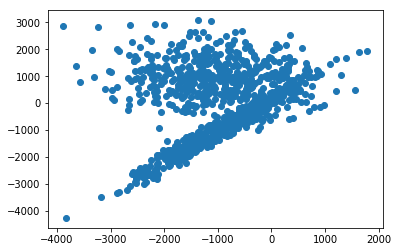

In [1]:
from IPython.display import Image
Image(filename='./assets/scatter-2d.png', width=500)

**If you were to manually group the data in the above graph, how would you do it?**<br>
    You might draw two circles, like this:

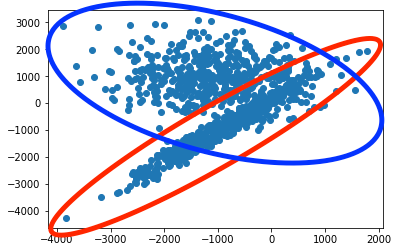

In [2]:
Image(filename='./assets/scatter-2d-circled.png', width=500)

**And in this case the grouping is pretty close to what you get through K-means -** <br>

where the following figure shows how the data is segmented by running K-means on our two dimensional dataset.**

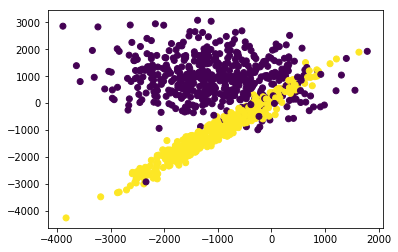

In [3]:
Image(filename='./assets/scatter-2d-segments.png', width=500)

### A real K-means example using synthetic data

(modified from the "Python Data Science Handbook" by Jake VanderPlas)

In [4]:
import os
home = os.path.expanduser('~')  # To make path to local home directory

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# create 50 separable points
X, y = make_blobs(n_samples=100, centers=4,
                  random_state=42, cluster_std=1.5)

# Fit the K Means model
model = KMeans(4, random_state=0)
y = model.fit_predict(X)

In [6]:
centroids = model.cluster_centers_

**Plot the input data (without cluster labels)**

In [7]:
# Make a function for common plot formatting
def format_plot(ax, title):
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    ax.set_xlabel('feature 1', color='black')
    ax.set_ylabel('feature 2', color='black')
    ax.set_title(title, color='black')

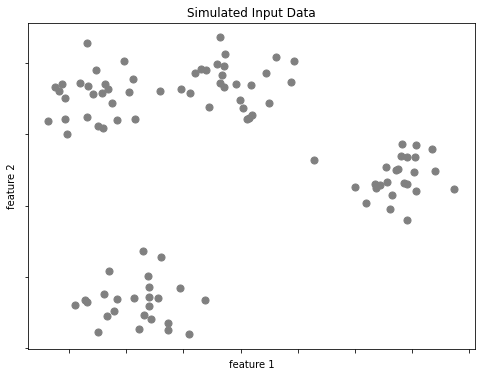

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, color='gray')

# format the plot
format_plot(ax, 'Simulated Input Data')

plt.show()
# fig.savefig('assets/k-means-clustering-1.png')

**Plot the data with color-coded cluster labels and star-shaped cluster centroids**

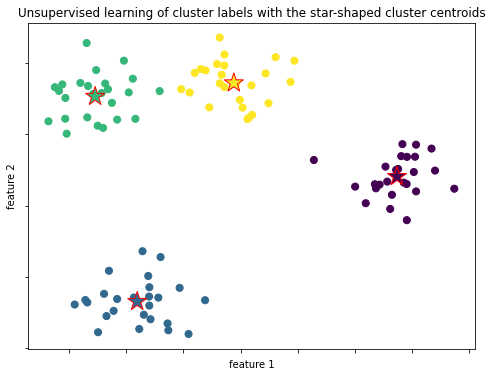

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='viridis')
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=400, c=range(4), cmap='viridis', edgecolors = 'red')

# format the plot
format_plot(ax, 'Unsupervised learning of cluster labels with the star-shaped cluster centroids')

plt.show()
# fig.savefig('assets/k-means-clustering-2.png')

### Visualizing K-means clusters in 3D using the interactive tool  [`plotly`](https://github.com/plotly/plotly.py)
Plotly is an interactive, open-source, and browser-based graphing library for Python

The above plots were created by clustering two attribute columns, only. There could have been other columns in our data set, but we just used two columns. If we want to use an additional column as a clustering feature we would want to visualize the cluster over three dimensions. <br>Here is an example that shows how to visualize cluster shapes with a 3D scatter/mesh plot in a Jupyter notebook using [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) to generate data and plotly for visualization.

In [10]:
# Initialize plotting library and functions for 3D scatter plots 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
#from sklearn.externals import six
import six
import pandas as pd
import numpy as np
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [11]:
# Create an artificial dataset with 3 clusters for 3 feature columns
# cf. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html
X, Y = make_classification(n_samples=100, n_classes=3, n_features=3, n_redundant=0, n_informative=3,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# rename X columns
df = rename_columns(df)
# and add the Y
df['y'] = Y
df.head(3)

x0          x1           x2  y
0  -909.189911  520.656482  1760.709952  2
1 -1368.581138 -773.768443 -1401.500190  1
2  2549.012193  572.536764   675.624442  2

In [12]:
df.tail(3)

x0           x1           x2  y
97   760.825775 -1154.759780   711.497391  0
98   332.048476 -1333.580988  1118.534352  0
99 -1263.659024  -426.252749  -369.368559  1

In [13]:
# Visualize cluster shapes in 3D

cluster1=df.loc[df['y'] == 0]
cluster2=df.loc[df['y'] == 1]
cluster3=df.loc[df['y'] == 2]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    marker = dict( size=2, color='red')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.values[:,0], y = cluster1.values[:,1], z = cluster1.values[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.values[:,0], y = cluster2.values[:,1], z = cluster2.values[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.values[:,0], y = cluster3.values[:,1], z = cluster3.values[:,2],
    color='red', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

You can interact with that 3D graph with click-drag or mouse wheel to zoom.

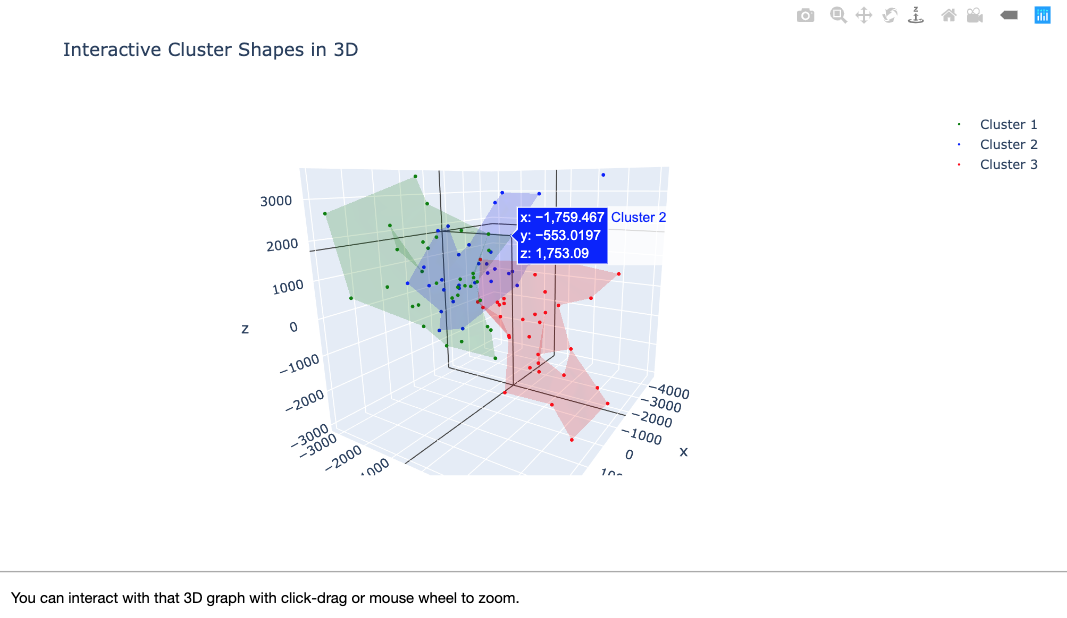

In [14]:
Image(filename='./assets/interactive-cluster-shapes-in-3d-plotly.png', width=600)

## Another example using synthetic 2D data of blobs
(modified from the book/GitHub repository by Aurélien Geron _Hands-On Machine Learning with Scikit-Learn and TensorFlow_ - https://github.com/ageron/handson-ml2)

In [15]:
from sklearn.datasets import make_blobs

In [16]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [17]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=42)

In [18]:
def plot_clusters(X, y=None):
    if y==None:
        plt.scatter(X[:, 0], X[:, 1], c='k', s=1)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=y, s=1)        
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=90)

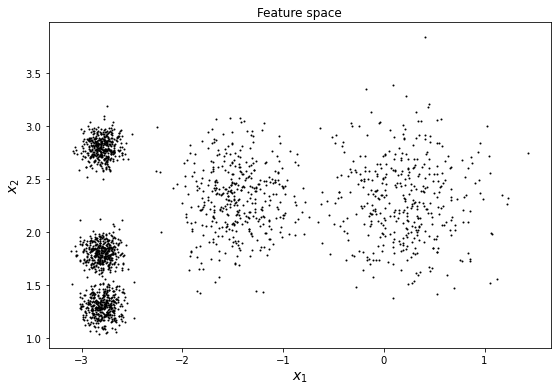

In [19]:
plt.figure(figsize=(9, 6))
plot_clusters(X)
plt.title('Feature space')
plt.show()

#### Train a K-means classifier and predict data sample assignment

In [20]:
from sklearn.cluster import KMeans

In [21]:
K = 5
kmeans = KMeans(n_clusters=K, random_state=42)
y_pred = kmeans.fit_predict(X)

In [22]:
y_pred is kmeans.labels_

True

Each data sample was assigned to one of the K clusters. How to check cluster-wise belonging and cardinality of each cluster:

In [23]:
# Using np.bincount()
print(len(y_pred))
print(y_pred)
np.bincount(y_pred)

2000
[3 1 0 ... 1 3 4]


array([403, 392, 401, 403, 401])

In [24]:
# or, using collections and Counter (this behaves like a dictionary)
import collections
collections.Counter(y_pred)

Counter({3: 403, 1: 392, 0: 403, 2: 401, 4: 401})

In [25]:
# or, converting to a Pandas data frame and using value_counts()
import pandas as pd
import numpy as np

df = pd.DataFrame({'data': y_pred})
print(df['data'].value_counts())

3    403
0    403
4    401
2    401
1    392
Name: data, dtype: int64


In [26]:
# or, Pandas series
pd.Series(y_pred).value_counts()

3    403
0    403
4    401
2    401
1    392
dtype: int64

In [27]:
# or use np.unique()
uniq, cnts = np.unique(y_pred, return_counts=True)
print(uniq)
print(cnts)

[0 1 2 3 4]
[403 392 401 403 401]


In [28]:
# or, using dictionary comprehension
counts = {int(value): list(y_pred).count(value) for value in set(y_pred)}
print(counts)

{0: 403, 1: 392, 2: 401, 3: 403, 4: 401}


In [29]:
# or, using np.where()
n = {i:len([j for j in np.where(y_pred==i)[0]]) for i in set(y_pred)}
iy = {i:[j for j in np.where(y_pred==i)[0]] for i in set(y_pred)}
print(n)
# Cluster-wise sample assignments
#print(iy) 

{0: 403, 1: 392, 2: 401, 3: 403, 4: 401}


The following K centroids (cluster centers) were estimated:

In [30]:
kmeans.cluster_centers_

array([[-1.4464431 ,  2.32289002],
       [ 0.20712757,  2.30341652],
       [-2.79003304,  1.29770015],
       [-2.79846237,  2.80004584],
       [-2.80372723,  1.80873739]])

**We can also predict the labels (cluster belonging) of new instances**:

In [31]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

### Visualizing the decision boundaries -  _Voronoi_ diagrams

Define initially some utility functions for plotting

In [32]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

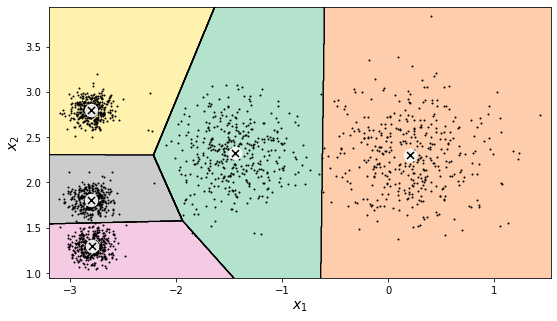

In [33]:
plt.figure(figsize=(9, 5))
plot_decision_boundaries(kmeans, X)
# Assuming you have made a subfolder prj/Sili-2020/results in your home catalogue (or adjust accordingly):
#plt.savefig('%s/prj/Seili-2020/results/kmeans_voronoi_plot.pdf' % (home), dpi=300)
plt.show()

## More details on the K-means algorithm

The K-Means algorithm is one of the fastest clustering algorithms, but also one of the simplest:
* First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
* Repeat until convergence (i.e., until the centroids stop moving):
    * Assign each instance to the closest centroid.
    * Update the centroids to be the mean of the instances that are assigned to them.

The `KMeans` class applies an optimized algorithm by default. To get the original K-Means algorithm (for didactic purposes), you must set `init="random"`, `n_init=1`and `algorithm="full"`. These hyperparameters are explained below.

We will run the K-Means algorithm for 1, 2 and 3 iterations, to see how the centroids move around:

In [34]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

... and do the plotting

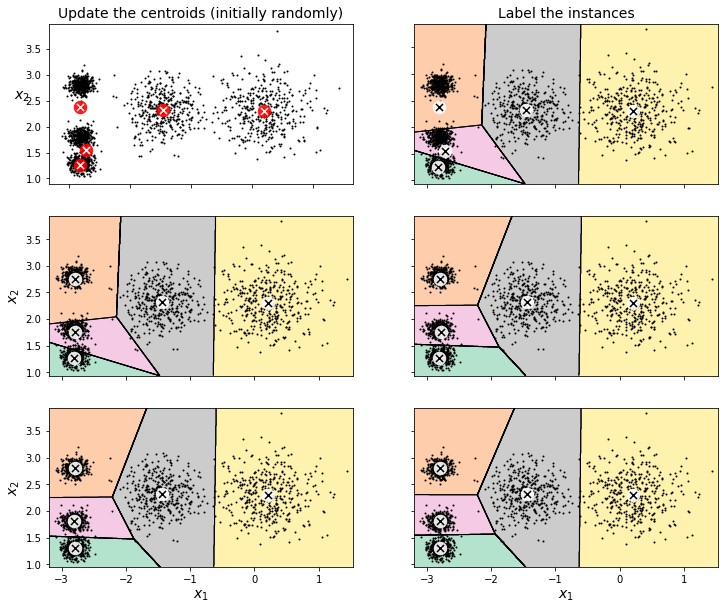

In [35]:
plt.figure(figsize=(12, 10))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

#plt.savefig('%s/prj/Seili-2020/results/kmeans_algorithm_plot.pdf' % (home), dpi=300)
plt.show()

## Finding the optimal number of clusters 

See also [here](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) and [here](https://stackoverflow.com/questions/15376075/cluster-analysis-in-r-determine-the-optimal-number-of-clusters/15376462#15376462)

Given our generated blob data with 5 blob centers, what if the number of clusters was set to a lower or greater value than K=5?

In [36]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

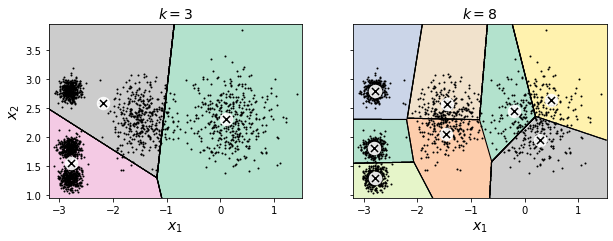

In [37]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

**The silhouette score**:

One heuristic approach to decide on the optimal number of clusters is to look at the [_silhouette score_](https://en.wikipedia.org/wiki/Silhouette_(clustering)), which is the mean _silhouette coefficient_ over all the data samples. A sample's silhouette coefficient is equal to $(b - a)/\max(a, b)$ where $a$ is the mean distance to the other samples in the same cluster (it is the _mean intra-cluster distance_), and $b$ is the _mean nearest-cluster distance_, that is the mean distance to the samples of the next closest cluster (defined as the one that minimizes $b$, excluding the samples's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the sample is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the sample may have been assigned to the wrong cluster.

In our case we will plot the silhouette score as a function of $k$:

In [38]:
from sklearn.metrics import silhouette_score

In [39]:
silhouette_score(X, kmeans.labels_)

0.656578194104489

In [40]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

In [41]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

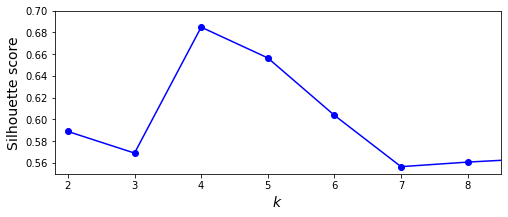

In [42]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

The plot tells that $k=4$ is a very good choice, but also shows that $k=5$ is quite good as well.

An even more informative visualization is given when one plot the silhouette coefficient of every sample, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a _silhouette diagram_

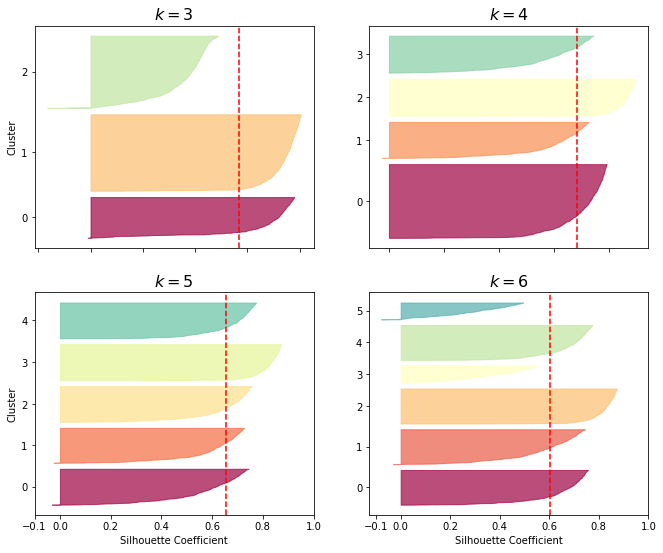

In [43]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### Using clustering for (color) image segmentation

In [44]:
from matplotlib.image import imread
image = imread(os.path.join("./data","ladybug.png"))
image.shape

(533, 800, 3)

In [45]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [46]:
%%time
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

CPU times: user 2min 44s, sys: 5.94 s, total: 2min 50s
Wall time: 26.2 s


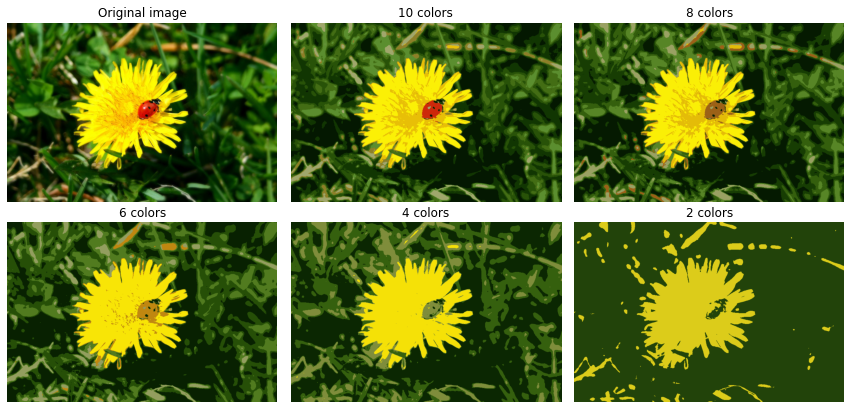

In [47]:
plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

## Other Clustering Algorithms 

- [Spectral Clustering](https://en.wikipedia.org/wiki/Spectral_clustering) - `from sklearn.cluster import SpectralClustering`
- [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) - `from sklearn.cluster import DBSCAN` 

### Visualizing K-Means Clusters in N Dimensions

What if you are clustering over more than 3 columns? How do you visualize that? One common approach is to split the 4th dimension data into groups and plot a 3D graph for each of those groups. Another approach is to split all the data into groups based on the K-means cluster value, then apply an aggregation function such as sum or average to all the dimensions in that group, then plot those aggregate values in a heatmap. This approach is described in the following:

We produce an artificial dataset with 12 feature columns to simulate a dataset in which each experimental unit (data point) have been characterized by a variety of attributes, such as different measurements. By plotting the K-means cluster groups and feature columns in a heatmap we can illustrate how we can use machine learning to categorize such a dataset into groups. This in order to obtain better insight to complex data without any prior model of the data generating mechanisms.

In [48]:
import pandas as pd
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [49]:
def rename_columns(df, prefix='x'):
    """
    Rename the columns of a dataframe to have X in front of them

    :param df: data frame we're operating on
    :param prefix: the prefix string
    """
    df = df.copy()
    df.columns = [prefix + str(i) for i in df.columns]
    return df

In [50]:
from sklearn.datasets import make_classification, make_regression

# create an artificial dataset with 100 samples from 4 clusters and with 12 features
X, Y = make_classification(n_samples=100, n_classes=4, n_features=12, n_redundant=0, n_informative=12,
                             scale=1000, n_clusters_per_class=1)
df = pd.DataFrame(X)
# ensure all values are positive (this is needed for our medical example)
df = df.abs()
# rename X columns
df = rename_columns(df)
# and the Y
df['y'] = Y
df.head(3).round(2)

x0       x1       x2       x3       x4       x5       x6       x7  \
0  6077.64  2769.77   183.31  1064.45  1979.02  2535.05  2566.95   228.70   
1    77.16  4515.67   493.84  2083.91   579.93  2977.99   261.63  2589.06   
2  2270.85  2563.08  1747.21   750.46  1543.89  1009.04  1470.21  1221.03   

        x8       x9      x10      x11  y  
0  3895.76  3309.84    95.35  1537.14  1  
1  1418.22   593.89  1363.92  1390.98  2  
2  1514.02  2588.51   674.39  2061.18  1

In [51]:
df.tail(3).round(2)

x0       x1       x2      x3       x4       x5       x6       x7  \
97  1046.54  1075.11  5378.37  232.58  6286.09  2592.82  3963.80  1635.25   
98  1008.15   794.80   686.44    3.49   627.84  1698.69  2995.12  2088.09   
99  2656.71  1092.68  1344.75  970.78   417.83  2366.80   688.75  8708.08   

         x8       x9      x10      x11  y  
97   472.95  2009.58  2774.56  3225.55  2  
98   847.63  2646.97    55.83  1781.48  3  
99  1034.25  4626.07  2505.01  1300.27  3

In [52]:
# split df into cluster groups
grouped = df.groupby(['y'], sort=True)

# compute sums for every column in every group
print('y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:')
sums = grouped.sum()
sums.round(2)

y = 0,1,2,3 denote group; x0, ... , x11 denote feature; entries are the grouped sum:


x0        x1        x2        x3        x4        x5        x6  \
y                                                                         
0  53446.53  55709.67  50890.76  45529.26  63463.24  44416.07  40737.82   
1  52080.77  33633.67  44212.48  38779.29  43909.60  41114.32  37018.72   
2  34909.73  60449.87  52922.21  65790.84  45943.56  53030.10  43799.69   
3  42201.04  39180.18  32925.50  42294.91  44580.32  32643.49  46534.43   

         x7        x8        x9       x10       x11  
y                                                    
0  49113.74  55793.66  37451.57  35036.91  52112.60  
1  32546.04  52308.03  27222.99  41036.19  41706.20  
2  35744.03  40448.94  37353.66  50634.95  47677.20  
3  53692.19  41166.72  46400.83  36221.56  47846.64

In [53]:
data = [go.Heatmap( z=sums.values.tolist(), 
                   y=['Group A', 'Group B', 'Group C', 'Group D'],
                   x=['Alanine aminotransferase (ALAT)',
                      'Albumin',
                      'Amylase (pancreatic)',
                      'Aspartate aminotransferase (ASAT)',
                      'Calcium',
                      'Cholesterol',
                      'Creatin Kinase (CK)',
                      'Chloride',
                      'C-reactive protein (CRP)',
                      'Creatinine',
                      'Iron',
                      'Glucose',
                      'Potassium',
                      'Lactate dehydrogenase'
                     ],
                   colorscale='Viridis')]

plotly.offline.iplot(data, filename='pandas-heatmap')

**For K-means from scratch and for more advanced examples using K-means clustering, see:**<br>
https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42 and <br>
https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

# David Sheehan: Clustering with Scikit with GIFs

**Describes (with GIFs and words) the most common clustering algorithms available through Scikit-learn**:<br>
https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

Clustering is the subfield of unsupervised learning that aims to partition unlabelled datasets into consistent groups based on some shared unknown characteristics. All the tools you will need are in Scikit-Learn so leaving the code to a minimum. Instead, through the medium of GIFs, this tutorial will describe the most common techniques.

Clustering algorithms can be broadly split into two types, depending on whether the number of segments is explicitly specified by the user. As we'll find out though, that distinction can sometimes be a little unclear, as some algorithms employ parameters that act as proxies for the number of clusters. But before we can do anything, we must load all the required modules in our python script. We also need to construct toy datasets to illustrate and compare each technique. The significance of each one will hopefully become apparent.

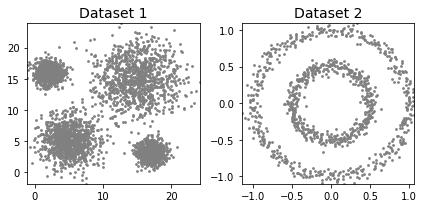

In [54]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

## K-means

Based on absolutely no empirical evidence (the threshold for baseless assertions is much lower in blogging than academia), [k-means](https://en.wikipedia.org/wiki/K-means_clustering) is probably the most popular clustering algorithm of them all. The algorithm itself is relatively simple: Starting with a pre-specified number of cluster centres (which can be distributed randomly or smartly (see `kmeans++`)), each point is initally assigned to its nearest centre. In the next step, for each segment, the centres are moved to the centroid of the clustered points. The points are then  reassigned to their nearest centre. The process is repeated until moving the centres derives little or no improvement (measured by the within cluster sum of squares- the total squared distance between each point and its cluster centre). The alogorithm is concisely illustrated by the GIF below.

![title](./assets/kmeans.gif)

Variations on the k-means algorithm include [k-medoids](https://en.wikipedia.org/wiki/K-medoids) and [k-medians](https://en.wikipedia.org/wiki/K-medians_clustering), where centroids are updated to the [medoid](https://en.wikipedia.org/wiki/Medoid) and median of existng clusters, repsectively. Note that, under k-medoids, cluster centroids must correspond to the members of the dataset. Alogorithms in the k-means family are sensitive to the starting position of the cluster centres, as each method converges to local optima, the frequency of which increase in higher dimensions. This issue is illustrated for k-means in the GIF below.

![title](./assets/kmeans-bad.gif)

k-means clustering in scikit offers several extensions to the traditional approach. To prevent the alogrithm returning sub-optimal clustering, the kmeans method includes the `n_init` and `method` parameters. The former just reruns the algorithm with n different initialisations and returns the best output (measured by the within cluster sum of squares). By setting the latter to 'kmeans++' (the default), the initial centres are smartly selected (i.e. better than random). This has the additional benefit of decreasing runtime (less steps to reach convergence).

Dataset1
Cluster 0: 1008
Cluster 1: 1022
Cluster 2: 1018
Cluster 3: 952


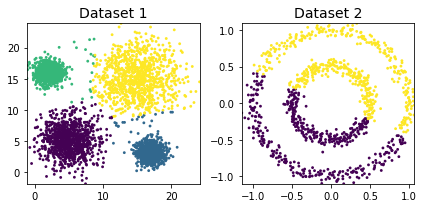

In [55]:
# implementing k-means clustering
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)

k-means performs quite well on ``Dataset1``, but fails on ``Dataset2``. In fact, these two datasets illustrate the strenghts and weaknesses of k-means. The algorithm seeks and identifies globular (essentially spherical) clusters. If this assumption doesn't hold, the model output may be inadaquate (or just really bad). It doesn't end there; k-means can also underperform with clusters of different size and density.

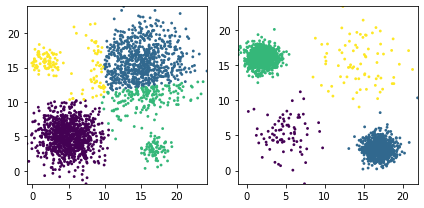

In [56]:
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[:2080,:],
                                                                                    dataset1[3000:3080,:]]))
kmeans_dataset2 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(np.vstack([dataset1[-2080:,],
                                                                                    dataset1[:80,]]))
cluster_plots(np.vstack([dataset1[:2080,],dataset1[3000:3080,]]), 
              np.vstack([dataset1[-2080:,],dataset1[:80,]]), 
              kmeans_dataset1, kmeans_dataset2,title1='', title2='')

For all its faults, the popularity of k-means (and related algorithms) stems from its versatility. Its average complexity is $O(k*n*T)$, where $k$, $n$ and $T$ are the number of clusters, samples and iterations, respectively. As such, it's considered one of the [fastest clustering algorithms out there](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). And in the world of big data, this matters.

## Expectation Maximisation (EM)

This technique is the application of the [general expectation maximisation (EM) algorithm](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm) to the task of clustering. It is conceptually related and visually similar to k-means (see GIF below). Where k-means seeks to minimise the distance between the observations and their assigned centroids, EM estimates some latent variables (typically the mean and covariance matrix of a mutltinomial normal distribution (called [Gaussian Mixture Models (GMM)](http://scikit-learn.org/stable/modules/mixture.html))), so as to maximise the log-likelihood of the observed data. Similar to k-means, the algorithm converges to the final clustering by iteratively improving its performance (i.e. reducing the log-likelihood). However, again like k-means, there is no guarantee that the algorithm has settled on the global minimum rather than local minimum (a concern that increases in higher dimensions).

![title](assets/em-only.gif)

In contrast to kmeans, observations are not explicitly assigned to clusters, but rather given probabilities of belonging to each distribution. If the underlying distribution is correctly identified (e.g. normal distribution in the GIF), then the algorithm performs well. In practice, especially for large datasets, the underlying distribution may not be retrievble, so EM clustering may not be well suited to such tasks.

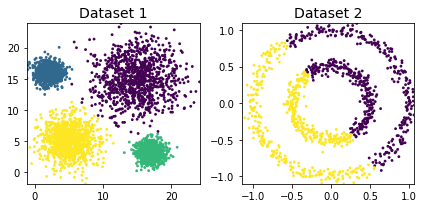

In [57]:
# implementing Expecation Maximistation (specifically Guassian Mixture Models)
em_dataset1 = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(dataset1)
em_dataset2 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(dataset2)
cluster_plots(dataset1, dataset2, em_dataset1.predict(dataset1),  em_dataset2.predict(dataset2))

No surprises there. EM clusters the first dataset perfectly, as the underlying data is normally distributed. In contrast, `Dataset2` cannot be accurately modelled as a GMM, so that's why EM performs so poorly in this case.

## Hierarchical Clustering

Unlike k-means and EM, [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) (HC) doesn't require the user to specify the number of clusters beforehand. Instead it returns an output (typically as a dendrogram - see GIF below), from which the user can decide the appropriate number of clusters (either manually or [algorithmically](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)). If done manually, the user may cut the dendrogram where the merged clusters are too far apart (represented by a long lines in the dendrogram). Alternatively, the user can just return a specific number of clusters (similar to k-means).

![title](./assets/hierarch.gif)

As its name suggests, it constructs a hierarchy of clusters based on proximity (e.g Euclidean distance or Manhattan distance - see GIF below). HC typically comes in two flavours (essentially, bottom up or top down): 

* Divisive: Starts with the entire dataset comprising one cluster that is iteratively split- one point at a time- until each point forms its own cluster.
* Agglomerative: The agglomerative method in reverse- individual points are iteratively combined until all points belong to the same cluster.

Another important concept in HC is the linkage criterion. This defines the distance between clusters as a function of the points in each cluster and determines which clusters are merged/split at each step. That clumsy sentence is neatly illustrated in the GIF below.

![title](./assets/hierarch_1.gif)

Dataset 1
Cluster 0: 990
Cluster 1: 1008
Cluster 2: 1002
Cluster 3: 1000


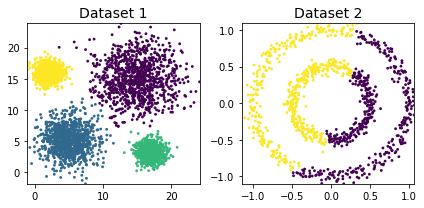

In [58]:
# implementing agglomerative (bottom up) hierarchical clustering
# we're going to specify that we want 4 and 2 clusters, respectively
hc_dataset1 = cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', 
                                              linkage='ward').fit_predict(dataset1)
hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='average').fit_predict(dataset2)
print("Dataset 1")
print(*["Cluster "+str(i)+": "+ str(sum(hc_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, hc_dataset1, hc_dataset2)

You might notice that HC didn't perform so well on the noisy circles. By imposing simple connectivity constraints (points can only cluster with their n(=5) nearest neighbours), HC captures the non-globular structures within the dataset.

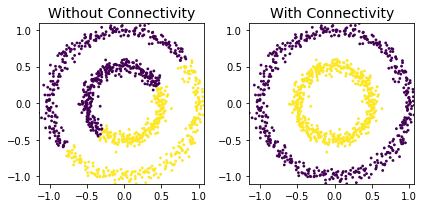

In [59]:
import warnings
warnings.filterwarnings('ignore')
# User Warning can be ignored - see https://github.com/scikit-learn/scikit-learn/issues/5327

hc_dataset2 = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete').fit_predict(dataset2)
connect = kneighbors_graph(dataset2, n_neighbors=5, include_self=False)
hc_dataset2_connectivity = cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean', 
                                              linkage='complete',connectivity=connect).fit_predict(dataset2)
cluster_plots(dataset2, dataset2,hc_dataset2,hc_dataset2_connectivity,
             title1='Without Connectivity', title2='With Connectivity')

Conveniently, the position of each observation isn't necessary for HC, but rather the distance between each point (e.g. a $n \times n$ matrix). However, the main disadvantage of HC is that it requires too much memory for large datasets (the $n \times n$  matrix blows up pretty quickly). Divisive clustering is $O(2^n)$, while agglomerative clustering comes in somewhat better at $O(n^2 log(n))$ (though special cases of $O(n^2)$ are available for single and maximum linkage agglomerative clustering).

## Mean Shift

Mean shift describes a [general non-parametric technique](https://en.wikipedia.org/wiki/Mean_shift) that locates the maxima of density functions, where Mean Shift Clustering simply refers to its application to the task of clustering. In other words, locate the density function maxima (mean shift algorithm) and then assign points to the nearest maxima. In that sense, it shares some similarities with k-means (the density maxima correspond to the centroids in the latter). Interestingly, the number of clusters is not required for its implementation and, as it's density based, it can detect clusters of any shape. Instead, the algorithm relies on a bandwidth parameter, which simply determines the size of neighbourhood over which the density will be computed. A small bandwidth could generate excessive clusters, while a high value could erroneously combine multiple clusters. Luckily, sklearn includes an [estimate_bandwidth function](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html). It uses the [k-nearest neighbours](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (kNN) algorithm to determine an optimal bandwidth value.

![title](./assets/mean_shift_0.gif)

[Originally invented in 1975](http://ieeexplore.ieee.org/document/1055330/), mean shift gained prominence when it was successfully applied to computer vision (seminal paper [#1](http://ieeexplore.ieee.org/document/400568/) [#2](https://dx.doi.org/10.1109%2F34.1000236)). The underlying maths can be found [here](https://saravananthirumuruganathan.wordpress.com/2010/04/01/introduction-to-mean-shift-algorithm/) and [here](http://efavdb.com/mean-shift/). Intuitively, cluster centers are initially mapped onto the dataset randomly (like k-means). Around each centre is a ball (the radius of which is determined by the bandwidth), where the density equates to the number of points inside each ball. The centre of the ball is iteratively nudged towards regions of higher density by shifting the centre to the mean of the points within the ball (hence the name). This process is repeated until balls exhibit little movement. When multiple balls overlap, the ball containing the most points is preserved. Observations are then clustered according to their ball - see animated gif below.

![title](./assets/mean_shift_tutorial.gif)

Now, you might be thinking "An algorithm that needs absolutely no input from the user and can detect clusters of any shape!!! This should be all over bioinformatics!!!". First of all, there's no guarantee that the value returned by estimate_bandwidth is appropriate (a caveat that becomes more pertinent in higher dimensions). Speaking of high dimensionality, mean shift may also converge to local optima rather than global optima. But the biggest mark against Mean Shift is its computational expense. It runs at $O(T*n^2)$, compared to $O(k*n*T)$ for k-means, where $T$ is number of iterations and $n$ represents the number of points. In fact, [according to the sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift), the `estimate_bandwidth` function scales particularly badly.

Dataset1: 4 clusters
Dataset2: 8 clusters


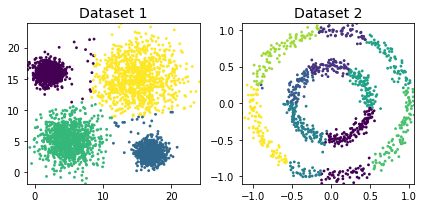

In [60]:
# implementing Mean Shift clustering in python
# auto-calculate bandwidths with estimate_bandwidth
bandwidths = [cluster.estimate_bandwidth(dataset, quantile=0.1) 
                         for dataset in [dataset1, dataset2]]
meanshifts = [cluster.MeanShift(bandwidth=band, bin_seeding=True).fit(dataset) 
              for dataset,band in zip([dataset1,dataset2],bandwidths)]
# print number of clusters for each dataset
print(*["Dataset"+str(i+1)+": "+ str(max(meanshifts[i].labels_)+1) + " clusters" 
        for i in range(2)], sep='\n')
# plot cluster output
cluster_plots(dataset1, dataset2, meanshifts[0].predict(dataset1), meanshifts[1].predict(dataset2))

Mean shift clusters `Dataset1` well, but performs quite poorly on `Dataset2`. This shouldn't be too surprising. It's easy to imagine where you should overlay 4 balls on the first dataset. There's just no way you could accurately partition `Dataset2` with two balls (see the GIF below). We've only considered a flat kernel (i.e. makes no distinction how the points are distributed within the ball), but, in some cases, a [Gaussian kernel might be more appropriate](http://sociograph.blogspot.co.uk/2011/11/accessible-introduction-to-mean-shift.html). Unfortunately, [scikit currently only accepts flat kernels](https://github.com/scikit-learn/scikit-learn/issues/442), so let's pretend Gaussian kernels were not mentioned. Either way, you'd need some really exotic kernel to identify the two clusters in `Dataset2`. (See also [Meanshift Algorithm for the Rest of Us (Python)](http://www.chioka.in/meanshift-algorithm-for-the-rest-of-us-python/))

![title](./assets/mean_shift_search.gif)

## Affinity Propagation (AP)

Affinity propagation (AP) describes an algorithm that performs clustering by passing messages between points. It seeks to identify highly representative observations, known as exemplars, where remaining data points are assigned to their nearest exemplar. Like mean-shift, the alogorithm does not require the number of clusters to be prespecified. Instead, the user must input two parameters: preference and damping. Preference determines how likely an observation is to become an exemplar, which in turn decides the number of clusters. In that sense, this parameter somewhat mimics the number of clusters parameter in k-means/EM. The damping parameter restricts the magnitude of change between successive updates. Without this, AP can be prone [to overshooting the solution and non-convergence](http://www.psi.toronto.edu/affinitypropagation/faq.html). Provided convergence is achieved, damping shouldn't significantly affect the output (see last GIF), though it could increase the time to reach convergence.

AP doesn't really lend itself to illustration with GIFs. We could still provide some GIFs, but a mathematical description might be more informative in this case (i.e. paraphrasing the [AP wikipedia page](https://en.wikipedia.org/wiki/Affinity_propagation)). AP starts off with a similarity (or affinity) matrix (`S`), where similarity (`s(i,j)`) is often formulated as the distance between points (e.g. negative Euclidean distance). The diagonal of the matrix (`s(i,i)`) is important, as this is where the preference value is inputted. In practice, 'passing messages between points' translates to updating two matrices. The first is the responsibility matrix (`R`), where `r(i,k)` represents the suitability of data point `k` to serve as an exemplar for point `i`. The second matrix is known as the availability matrix (`A`), where `a(i,k)` indicates the appropriateness of point `k` being an exemplar for point `i`, taking into account how well suited `k` is to serve as an exemplar to other points.

![title](./assets/affinity_propagation_similarity.gif)

In mathematical terms, both matrices are initialised to zero and are updated iteratively accroding to the following rules:

$$r(i,k) = s(i,k) -  \max_{k' \neq k} \left\{ a(i, k') + s(i, k') \right \}$$
$$a(i,k)_{i \neq  k} = \min \left( 0, r(k,k) + \sum_{i' \not\in \{i,k\}} \max(0, r(i',k)) \right)$$
$$a(k,k) = \sum_{i' \neq k} \max(0, r(i',k))$$

At each iteration, `A` and `R` are added together. Exemplars are represented by rows in which the diagonal of this matrix are positive (i.e. `r(i,i)` + `s(i,i)` > 0). The algorithm terminates after a specified number of updates or if the exemplars remain unchaged over several iterations. Points are then mapped to the nearest examplar and clustered accordingly.

![title](./assets/affinity_propagation_exemplars.gif)

Did not converge
Did not converge
Dataset1
# Clusters: 0
Dataset2
# Clusters: 0


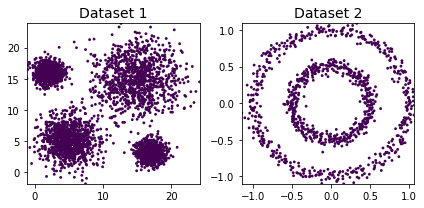

CPU times: user 58.6 s, sys: 820 ms, total: 59.4 s
Wall time: 58.4 s


In [61]:
%%time
# implementing Affinity Propagation
ap_dataset1 = cluster.AffinityPropagation(verbose=True).fit_predict(dataset1)
ap_dataset2 = cluster.AffinityPropagation(verbose=True).fit_predict(dataset2)
print('Dataset1')
print("# Clusters:",max(ap_dataset1)+1)
print('Dataset2')
print("# Clusters:",max(ap_dataset2)+1)
cluster_plots(dataset1, dataset2, ap_dataset1, ap_dataset2)

It's clear that the default settings in the [sklearn implementation of AP](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AffinityPropagation.html) didn't perform very well on the two datasets (in fact, neither execution converged). AP can suffer from non-convergence, though appropriate calibration of the damping parameter can minimise this risk. While AP doesn't explicitly require you to specify the number of clusters, the preference parameter fulfills this role in practice. Playing around with preference values, you'll notice that AP is considerably slower than k-means. That's because AP runtime complexity is $O(n^2)$, where $n$ represents the number of points in the dataset. But it's not all bad news. AP simply requires a similarity/affinity matrix, so the exact spatial position of each point is irrelevant. This also means that the algorithm is relatively insensitive to high dimensional data, assuming your measure of similarity is robust in higher dimensions (not the case for squared Euclidean distance). Finally, AP is purely deterministic; so there's no need for multiple random restarts á la k-means. For all of these reasons, [AP outperforms its competitors](http://science.sciencemag.org/content/315/5814/972) in complex computer visions tasks (e.g. clustering human faces).

Converged after 117 iterations.
Converged after 53 iterations.
Dataset1
# Clusters: 4
Dataset2
# Clusters: 3


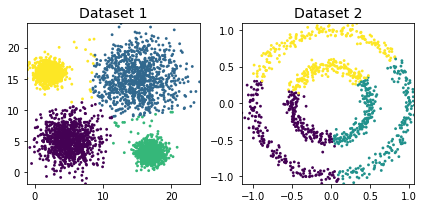

In [62]:
ap_dataset1 = cluster.AffinityPropagation(preference=-10000, damping=0.9, verbose=True).fit_predict(dataset1)
ap_dataset2 = cluster.AffinityPropagation(preference=-100, damping=0.8, verbose=True).fit_predict(dataset2)
print('Dataset1')
print("# Clusters:",max(ap_dataset1)+1)
print('Dataset2')
print("# Clusters:",max(ap_dataset2)+1)
cluster_plots(dataset1, dataset2, ap_dataset1, ap_dataset2)

As you can see, we eventually arrived at some parameters that returned decent clustering for `Dataset1`. And just in case you're curious how the clustering was affected by the parameters:

![title](./assets/affinity_propagation_search.gif)

## DBSCAN

[Density-based spatial clustering of applications with noise](https://en.wikipedia.org/wiki/DBSCAN) (DBSCAN) is a density based clustering algorithm that can neatly handle noise (the clue is in the name). Clusters are considered zones that are sufficiently dense. Points that lack neighbours do not belong to any cluster and are thus classifed as noise (a state that is not immediately attainable under traditional k-means or HC). DBSCAN doesn't require the user to specify the number of clusters; it works that out for you. Instead, the user must define the minimum number of observations that constitutes a cluster (`minPts`) and the size of the neighbourhoods (epsilon - often denoted as `eps` or $\epsilon$). In simple terms, DBSCAN identifies clusters and then expands those clusters by scanning the neighbourhoods of the assigned points. Once all neighbourhoods have been exhausted, the process repeats with a new cluster, until all observations belong to a segment or have been classified as noise (see GIF below).

![title](./assets/DBSCAN_tutorial.gif)

The most obvious advantage of DBSCAN is that the user doesn't need to specify the number of clusters. Also, as already stated, the ability to robustly treat outliers as noise distinguishes it from other techniques. Finally, being density based, DBSCAN can return clusters of any shape.

Dataset1:
Number of Noise Points: 47 (4000)
Dataset2:
Number of Noise Points: 2 (1000)


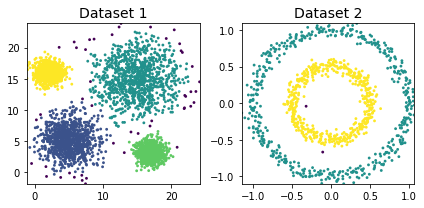

In [63]:
# implementing DBSCAN
dbscan_dataset1 = cluster.DBSCAN(eps=1, min_samples=5, metric='euclidean').fit_predict(dataset1)
dbscan_dataset2 = cluster.DBSCAN(eps=0.1, min_samples=5, metric='euclidean').fit_predict(dataset2)
# noise points are assigned -1
print('Dataset1:')
print("Number of Noise Points: ",sum(dbscan_dataset1==-1)," (",len(dbscan_dataset1),")",sep='')
print('Dataset2:')
print("Number of Noise Points: ",sum(dbscan_dataset2==-1)," (",len(dbscan_dataset2),")",sep='')
cluster_plots(dataset1, dataset2, dbscan_dataset1, dbscan_dataset2)

Wow! It managed to correctly segment `Dataset2` without knowing number of clusters beforehand. But before you throw k-means in the bin and get a DBSCAN tattoo ([a google image search returned nothing interesting](https://www.google.co.uk/search?q=dbscan+tattoo&safe=off&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjbvJWFz_vRAhUBWhoKHTOrCsAQ_AUICCgB&biw=1600&bih=794)), DBSCAN does have its flaws too. In rare cases, border points can flip between clusters, depending on the order by which the data is processed, meaning different executions can return different outputs. Like all clustering techniques discussed in this tutorial, DBSCAN suffers from the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) - distance functions become less meaningful in higher dimensions, as all points are 'far away' from each other. For similar reasons, it can be hard to determine the appropriate values of epsilon and minPts (though trial and error will usually suffice in 2 dimensions - see below GIF).

![alt-text-2](./assets/DBSCAN_search.gif)

But these concerns are either minor or not unique to DBSCAN. A much bigger issue arises if the clusters exhibit varying density. In such cases, it may be impossible to find a decent epsilon value, as one single value can't perform well on each cluster. This is where [OPTICS](https://en.wikipedia.org/wiki/OPTICS_algorithm) (Ordering points to identify the clustering structure) would come in. Unfortunately, OPTICS isn't currently available in Scikit learn, [though there is a nearly 4 year old (active!) pull request open on github](https://github.com/scikit-learn/scikit-learn/pull/1984). There's also an extension of DBSCAN called [HDBSCAN](http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html) (where the 'H' stands for Hierarchical, as it incorporates HC). [It overcomes some of DBSCAN traditional faults](http://hdbscan.readthedocs.io/en/latest/comparing_clustering_algorithms.html). However, it's also currently not included in scikit (though there is an [extensively documented python package on github](https://github.com/scikit-learn-contrib/hdbscan)).

## Summary

You may be wondering which clustering algorithm is the best. Well, the nature of the data will answer that question. For example, a large dataset could preclude computationally intensive algorithms (e.g hierarchical clustering or affinity propagation). Is anything known about the underlying structure (e.g. globular versus non-globular)? Are you looking for a specific number of clusters?  So, unfortunately, you need to have various algorithms in your toolbox, ready to deploy as the circumstances dicate (or you could just use k-means for everything).

_Thanks to the blogScripts by David Sheehan_ - [MIT License](https://github.com/dashee87/blogScripts/blob/master/LICENSE), Copyright (c) 2016 dashee87